In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm

In [23]:
file = '../../../Documentos/santa_catarina_data/1095_MagLine.XYZ'
#file = 'test_real_data.txt'
names = ['Y','X','GPSALT','MAGRAW','MAGIGRF','IGRF','LONG','LAT']
dataframe = 'anitapolis.txt'
decimated = 'anitapolis_decimated.txt'

In [24]:
lat1=[]
long1=[]
y=[]
x=[]
d=[]
igrf1=[]
z = []
l = []

with open(file) as infile:
    for line in infile:
        if line[:4]=='Line':
            number = line
            pass
        elif line[:3]=='/ -':
            pass
        elif line[135:136]=='*':
            pass	
#       elif (line[63:66]=='-19' or line[63:66]=='-20') and (line[77:80]=='-51' or line[77:80]=='-52' or line[77:80]=='-53'):
        elif (line[59:62]=='-49') and (line[71:74]=='-27'):
            x.append(line[4:10])
            y.append(line[14:21])
            z.append(line[23:30])
            lat1.append(line[71:81])
            long1.append(line[59:69])
            d.append(line[169:178])
            igrf1.append(line[114:123])
            l.append(number[6:11])
            
        elif line[0]=='T':
            break

In [25]:
lat=filter(None,lat1)
long=filter(None,long1)
ycord=filter(None,y)
xcord=filter(None,x)
zcord=filter(None,z)
data=filter(None,d)
igrf=filter(None,igrf1)

In [26]:
out=np.array([xcord,ycord,zcord,long,lat,data,igrf])        
out=out.T.astype(np.float)

In [27]:
dic={'Line':l, 'Y':out[:,0],'X':out[:,1],
    'GPSALT':out[:,2],'LONG':out[:,3],
    'LAT':out[:,4],'MAGIGRF':out[:,5],'IGRF':out[:,6]}

In [28]:
dataset = pd.DataFrame(dic)

In [77]:
mask = (dataset['LONG'] <= -49.0) & (dataset['LONG'] >= -49.2) & (dataset['LAT'] <= -27.7) & (dataset['LAT'] >= -27.95)
dataset[mask].to_csv(dataframe, index=None, sep=' ', mode='w')

In [78]:
dataset[mask].iloc[range(0, dataset[mask].shape[0], 12)].to_csv(decimated, index=None, sep=' ', mode='w')

In [79]:
tfa_complete = pd.read_csv('anitapolis.txt', skipinitialspace=True, delim_whitespace=True)
tfa_decimated = pd.read_csv('anitapolis_decimated.txt', skipinitialspace=True, delim_whitespace=True)

In [80]:
yc = tfa_complete['Y'].get_values()
xc = tfa_complete['X'].get_values()
dc = tfa_complete['MAGIGRF'].get_values()
lat = tfa_complete['LAT'].get_values()
long = tfa_complete['LONG'].get_values()

yd = tfa_decimated['Y'].get_values()
xd = tfa_decimated['X'].get_values()
dd = tfa_decimated['MAGIGRF'].get_values()

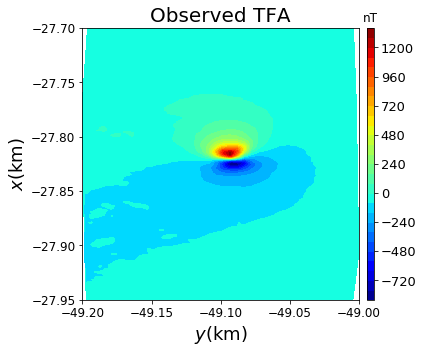

In [81]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(long, lat, dc, 30, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.plot(long,lat, 'ok', markersize=0.2)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig(mypath+'diorama_real_data.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

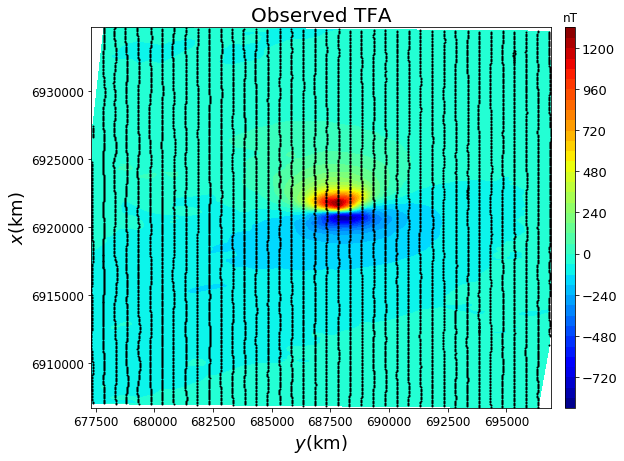

In [82]:
fig, ax = plt.subplots(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(yd, xd, dd, 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.plot(yd,xd, 'ok', markersize=1)
#circle = plt.Circle((478200., 8212800.), 2000., color='k', alpha=0.2)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
#plt.savefig(mypath+'diorama_real_data.png', dpi=300)
ax.add_artist(circle)
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

In [ ]:
dd

In [ ]:
index = []
with open(file, 'r') as f:
    for i, line in enumerate(f):
        if line[:4] == 'Line':
            index.append(i)

In [ ]:
data = open(dataframe, 'w+')
deci = open(decimated, 'w+')
with open (file,'r+') as f:
    for i in range(len(index)-1):
        n = index[i+1] - index[i] - 1
        #print i, len(index), index[i+1], index[-1]
        dataset = pd.read_csv(f, na_values='*',
                nrows=n, usecols=(0,1,3,7,12,13,14,15), skiprows= index[0]+1,
                names=names,skipinitialspace=True, delim_whitespace=True)
        mask = (dataset['LONG'] <= -51.183) & (dataset['LONG'] >= -51.223) & (dataset['LAT'] <= -16.14) & (dataset['LAT'] >= -16.190)
        dataset[mask].to_csv(data, header=None, index=None, sep=' ', mode='w+')
        dataset[mask].iloc[range(0, dataset[mask].shape[0], 12)].to_csv(deci, index=None, header=None, sep=' ', mode='w+')

In [ ]:
dc